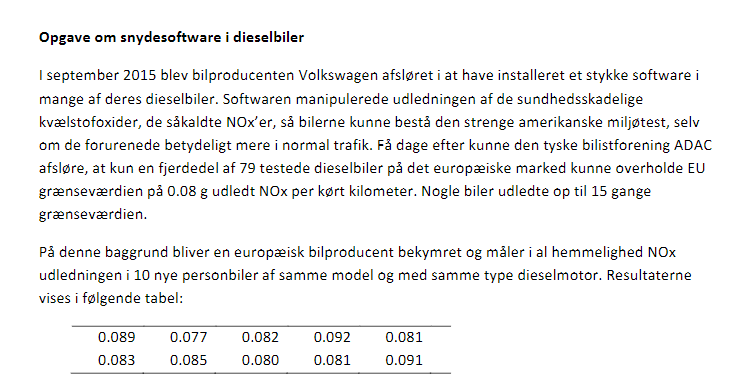

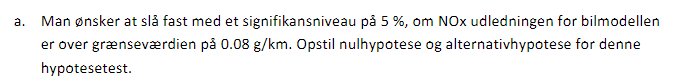

Vi regner med at der udledes mere $0.08 \frac{g}{km}$, derfor er det vores alternativ hypotese. Så: <br>
$H_0: \mu = 0.08$ <br>
$H_1: \mu > 0.08$

I det følgende vil det derfor forsøges at afkaste nulhypotesen.

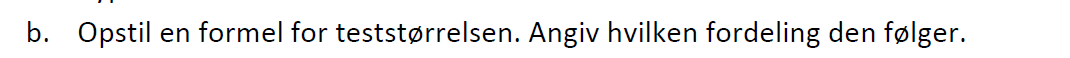

Jf. 'oversigt over hypotese tests' følger denne en t-fordeling, med n-1 frihedsgrader
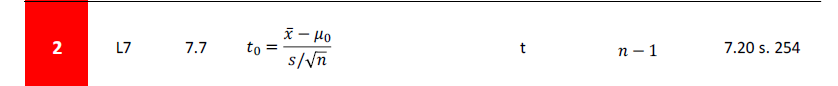

$t_0=\frac{\bar{x}-\mu_0}{s/\sqrt{n}}$ <br>
Hvor $\bar{x}$ er middelværdien af stikprøven, $\mu_0$ er middelværdien af populationen, $s$ er standardafvigelsen af stikprøven og $n$ er antallet af samples i stikprøven.

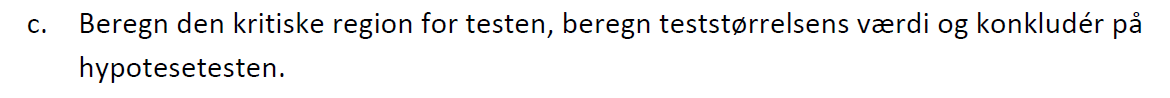

Den kritiske region er der hvor vi ønsker at afkaste nulhypotesen. <br> 
Da alternativ hypotesen er formuleret med '>' er den kritiske region den højre hale. 

Læser data først

In [1]:
D = read.table("snydesoftware.csv", header=TRUE)
x = D$NOx
mu0 = 0.08
alfa = 0.05
n = length(x)

Herefter regnes $t_\alpha$. $t_\alpha$ er punktet hvor der er 95% sandsynlighed for at der antages en værdi til venstre og 5% til højre. Matematisk betyder det blot, at det er det punkt på x-aksen, hvor arealet er 0.95 til højre og 0.05 til højre.

In [2]:
# Mean and degrees of freedom
t_alfa = qt(1-alfa, n-1)
t_alfa

[1] 1.833113

Hvis vores teststørrelse $t_0$ er større end $t_\alpha$, så forkastes nulhypotesen. Men hvorfor?

In [3]:
x_streg = mean(x)
s = sd(x)

# calculate test
t_0 = (x_streg-mu0)/(s/sqrt(n))
t_0

# Evaluate
t_0 > t_alfa

[1] 2.582188

[1] TRUE

Da $t_0 > t_\alpha$ forkastes nulhypotesen.

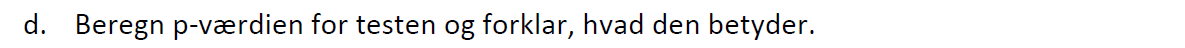

P-værdien er sandsynligheden til højre for teststørrelsen hvis den er højrehalet og til venstre for den hvis den er venstre halet. Dette er sandsynligheden for at nulhypotesen ikke skulle have været blevet forkastet. 

In [4]:
p = 1 - pt(t_0, n-1)
p

[1] 0.01479511

Vi forkaster nulhypotesen med et opnåede signifikansniveau på 1,5%. Dvs. at der er 1,5% sandsynlighed for en type 1 fejl, altså at nulhypotesen er blevet forkastet, men at den var sand. 

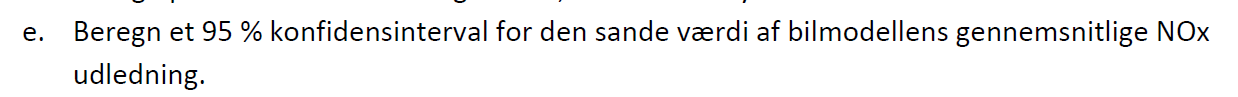

Kan beregnes med nedstående formel hvor $\alpha=0.05$, så $(1-0.05)\cdot 100\% = 95\%$

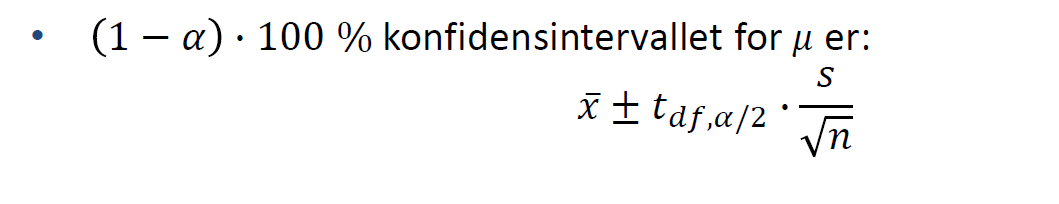

In [5]:
t_alfa_halv = qt(1-alfa/2, n-1)
konf_start = x_streg - t_alfa_halv * s / sqrt(n)
konf_slut = x_streg + t_alfa_halv * s / sqrt(n)

konf_start
konf_slut

[1] 0.08050815

[1] 0.08769185

Så konfidensintervallet er [0.081; 0.088] 

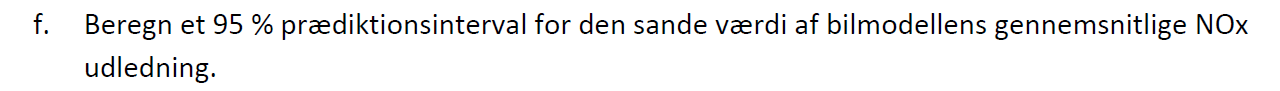

Kan beregnes ud fra nedstående formel:
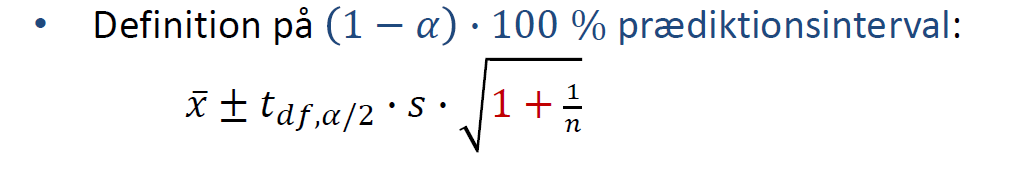

In [6]:
prae_start = x_streg - t_alfa_halv * s * sqrt(1+1/n)
prae_slut = x_streg + t_alfa_halv * s * sqrt(1+1/n)
prae_start
prae_slut

[1] 0.07218717

[1] 0.09601283

Så prædikationsintervallet er [0.072; 0.096]

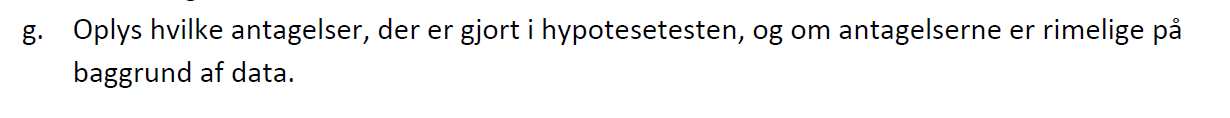

Vi har antaget CGS (centrale grænseværdi sætning). <br> 
Der er kun 10 observationer, hvilket ikke er rat mange, derfor er vi ikke sikre på at CGS holder. Hvis vi havde over 30 ville det have været bedre. <br>
Stem and leaf plot ser symmetrisk ud, hvor halerne hurtigt fader ud. <br>
Normalfordeling plottet (Quantile-quantile plot), viser ikke en helt lineær sammenhæng. Derfor kan vi heller ikke være sikre på at stikprøvedataen er normalfordelt. 


  The decimal point is 2 digit(s) to the left of the |

  7 | 7
  8 | 01123
  8 | 59
  9 | 12



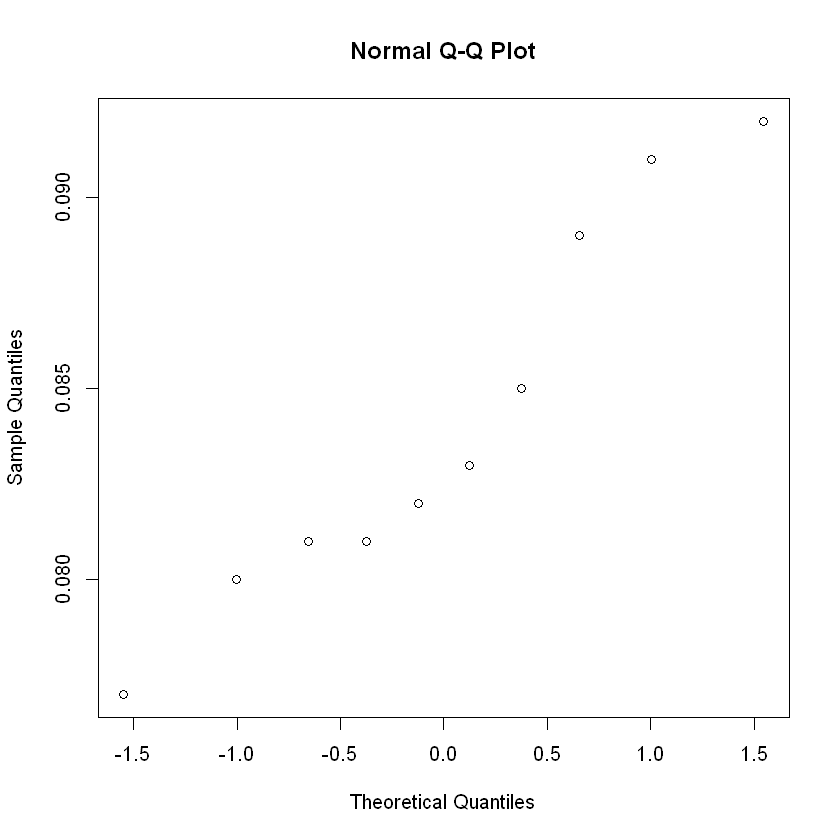

In [7]:
stem(x)
qqnorm(x)